IMPORTING THE REQUIRED LIBRARIES

In [75]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [76]:
df=pd.read_csv("World_Happiness_Report.csv")

In [77]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


we found the data set has 158 Rows and 12 columns including the target variable Happiness Score

In the above dataset the target variable is Happiness Score which is sum of succeeding columns (for eg Happiness score of Switzerland is 7.587 which is sum of(.034+1.39+.94+.66+.42+.296+.2.517))

Also the columns ['Country','region' and "Happiness Rank"] is of no use in this data set to predict the happiness score. We can drop these columns

# Dropping Columns and making Country as the index 

In [78]:
df.drop(["Region","Happiness Rank"],axis=1,inplace=True)

In [79]:
df.head()

,Country,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [80]:
df1=df.set_index("Country")

In [81]:
df1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
Rwanda,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


Now after cleaning the dataset we have 158 rows and 9 Columns with Happiness Score as the target variable

Some observations about the dataset:
    1. The target Variable is the sum of succeding columns
    2. SO there is no point of training this model to predict the happiness score
    3. Ranking of the country is done as per the Happiness Score
    4. We can still go for statitical summary,correlation and a Linear Model regression prediction of this dataset to find the happiness score

In [82]:
#statistical Summary
df1.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [83]:
#checking for null values
df1.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values in this dataset

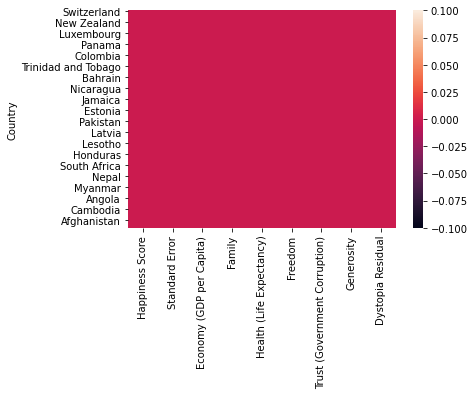

In [84]:
#checking null values using heat map
sns.heatmap(df1.isnull())

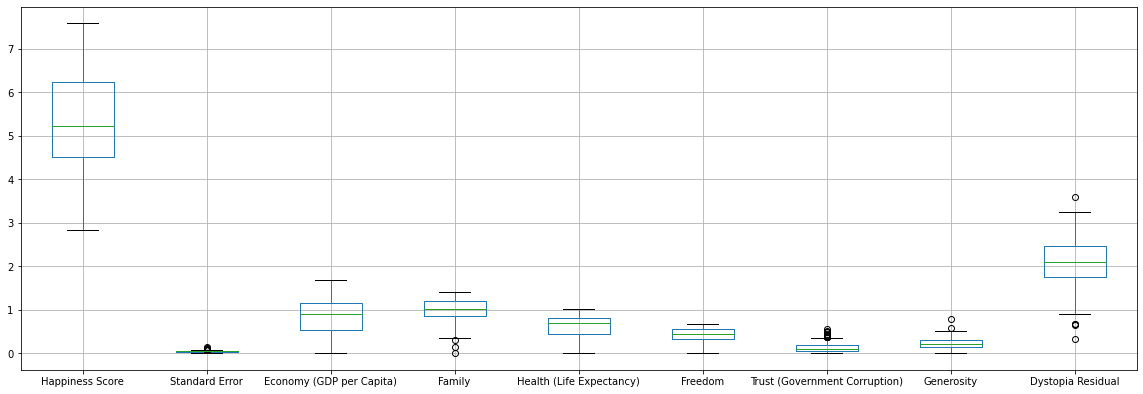

In [85]:
#checking for outliers

df1.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

As the outliers lie very near to the whiskers it won't affect much our dataset so we are not dropping any rows 

In [86]:
#checking for correlation
cor=df1.corr()

In [87]:
cor

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


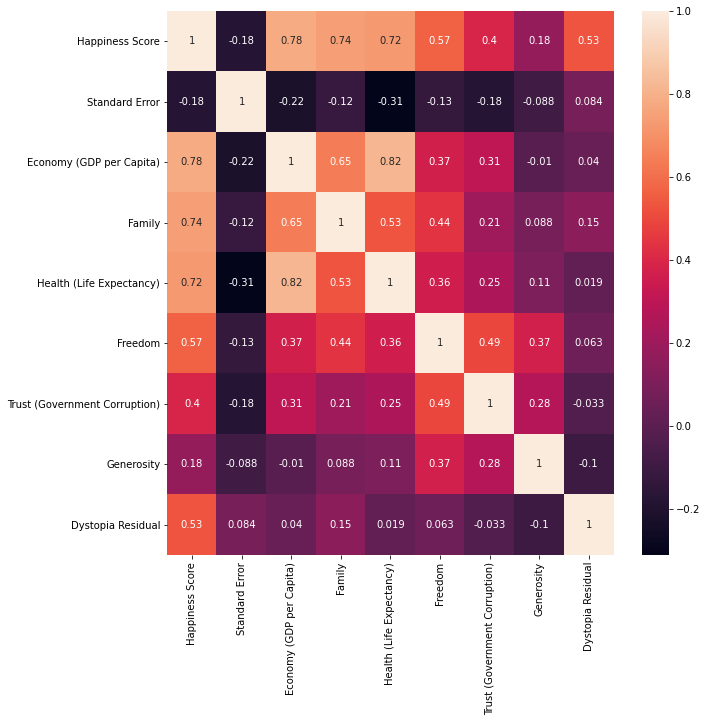

In [88]:
#using heat map to get the correlation
plt.figure(figsize=[10,10])
sns.heatmap(cor,annot=True)

We found that "Standard Error", "Trust","Generosity" and "Dystopia Residual" is poorly related to the happiness score

In [89]:
cor1=df.corr()
cor1['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

# DATA DISTRIBUTION AMONG ALL THE COLUMNS MULTI VARIATE ANALYSIS

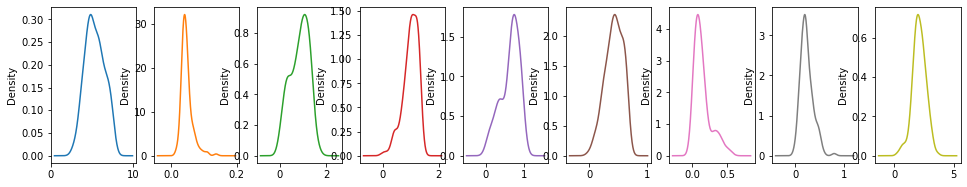

In [90]:
df1.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,figsize=(20,20))
plt.show()

# SPLITTING THE DATA

In [91]:
x=df1.drop('Happiness Score',axis=1)
y=df1['Happiness Score']

In [92]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,
Switzerland,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [93]:
y.head()

Country
Switzerland    7.587
Iceland        7.561
Denmark        7.527
Norway         7.522
Canada         7.427
Name: Happiness Score, dtype: float64

In [94]:
#checking for skewness
x.skew()

Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

There are some skewness in the data so we will use power_transform to remove the skewness

In [95]:
from sklearn.preprocessing import power_transform

In [96]:
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [97]:
df_new.skew()

Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

the skewness is now within the acceptable range

In [98]:
x=df_new

In [99]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


# MODEL TRANING

In [100]:
from sklearn.metrics import r2_score

In [101]:
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    RMS=r2_score(y_test,predlr)
    if RMS>maxAccu:
        maxAccu=RMS
        maxRS=i
print("Best R2 Score is: ",maxAccu,"on Random_state: ",maxRS)

Best R2 Score is:  0.9962681348541688 on Random_state:  189


we get the best R2 score at Random State 189 so we will use this seed value to train our model

# CREATING TRAIN TEST SPLIT

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=189)

In [103]:
LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)

In [104]:
print("Error:")
print("Mean_Absolute_Error: ",mean_absolute_error(y_test,predlr))
print("Mean_Squared_Error: ",mean_squared_error(y_test,predlr))
print("Root_Mean_Squared_Error: ",np.sqrt(mean_squared_error(y_test,predlr)))

Error:
Mean_Absolute_Error:  0.05791537407798585
Mean_Squared_Error:  0.0049636181211293205
Root_Mean_Squared_Error:  0.07045294969786091


In [105]:
print("R2_score: ",r2_score(y_test,predlr))

R2_score:  0.9962681348541688


In [108]:
#trying to predict the happiness score by providing the values
t=np.array([.03411,1.39651,1.34951,0.94143,.66557,.41978,.29678,2.51738])#fitting values for Switzerland

In [109]:
t.shape

(8,)

In [110]:
t=t.reshape(1,-1)

In [111]:
t.shape

(1, 8)

In [112]:
LR.predict(t)

array([8.03185759])

From the result we can see it almost predicts the correct value for switzerland, the difference in result can be explained with the fact that training this model is unreliable as the target variable is the sum of succeding variables

# SAVING THE MODEL 

In [113]:
import joblib
joblib.dump(LR,"Practice_Project_1_World_Happiness_Report.pkl")

['Practice_Project_1_World_Happiness_Report.pkl']

In [114]:
import os

In [115]:
print(os.getcwd())

C:\Users\No
